# Background

### Data

Data yang akan dianalisa merupakan data transaksi yang berasal dari perusahaan SaaS yang menjual penjualan dan pemasaran
perangkat lunak ke perusahaan lain (B2B).

SaaS (software as a service) adalah perangkat lunak yang dijadikan sebagai layanan dan bersifat online. SaaS juga disebut sebagai layanan aplikasi berbasis komputasi awan atau cloud. Ketika menggunakan model layanan SaaS, kita hanya perlu menggunakan aplikasi tersebut tanpa harus memahami hal teknis dari layanan tersebut seperti mengenai penyimpanan data dan server serta pengelolaan perangkat. Pengguna layanan Saas umumnya mengakses SaaS menggunakan autentikasi berupa username dan password melalui browser. Alih-alih setiap pengguna harus meng-install perangkat lunak di komputer, mereka dapat mengakses program melalui internet. Umumnya pengguna layanan SaaS harus membayar biaya berlangganan, bisa bulanan atau tahunan.

### Problem Statement
Bagaimana cara meningkatkan profit dengan meminimalisir kerugian

### Goals
Mengetahui faktor faktor apa saja yang membuat perusahaan merugi

# Data Understanding and Cleaning

#### Import Data dan Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import normaltest,  mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
df = pd.read_csv('SaaS-Sales.csv')
df.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Keterangan =  
- Row ID: ID unik untuk setiap transaksi
- Order ID: ID unik setiap pesanan
- Order Date: Tanggal ketika pesanan dipesan
- Date Key: Tanggal dalam bentuk numerik (YYYYMMDD)
- Contact Name = Nama orang yang memesan
- Country: Negara tempat pesanan di pesan
- CIty: Kota tempat pesanan di pesan
- Region: Region tempat pesanan di pesan
- Subregion: Subregion tempat pesanan di pesan
- Customer: Nama perusahan yang memesan
- Customer ID: ID unik untuk setiap customer
- Industry: Industri dari customer
- Segment: segmen dari customer
- Product: Produk yang dipesan
- License: License key setiap produk
- Sales: Total penjualan dari transaksi
- Quantity: Total produk dari transaksi
- Discount: Diskon yang belaku untuk produk dari transaksi
- Profit: Laba yang didapatkan dari transaksi

In [2]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (9994, 19)


Karena sudah ada Order Date maka kita tidak membutuhkan Date Key

In [3]:
df = df.drop(columns ='Date Key')

Selanjutnya, kita cek apakah tipe data setiap kolom sudah benar

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Contact Name  9994 non-null   object 
 4   Country       9994 non-null   object 
 5   City          9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Subregion     9994 non-null   object 
 8   Customer      9994 non-null   object 
 9   Customer ID   9994 non-null   int64  
 10  Industry      9994 non-null   object 
 11  Segment       9994 non-null   object 
 12  Product       9994 non-null   object 
 13  License       9994 non-null   object 
 14  Sales         9994 non-null   float64
 15  Quantity      9994 non-null   int64  
 16  Discount      9994 non-null   float64
 17  Profit        9994 non-null   float64
dtypes: float64(3), int64(3), obj

Ternyata Order Date masih dalam bentuk tipe data object maka kita ubah ke datetime

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

Berikut 5 Dataframe dengan index pertama setelah Order Date diubah tipe datanya menjadi datetime dan setelah menghilangkan kolom Date Key:

In [6]:
df.head()

,Row ID,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


## Missing Value

In [7]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Tidak terdapat nilai kosong ( missing value ) pada dataframe kita

## Data Numerik

Membuat dataframe berisi data numerik dengan Row ID sebagai primary key

In [8]:
numeric = df.select_dtypes('number')
numeric.head()

,Row ID,Customer ID,Sales,Quantity,Discount,Profit
0,1,1017,261.9600,2,0.00,41.9136
1,2,1017,731.9400,3,0.00,219.5820
2,3,1056,14.6200,2,0.00,6.8714
3,4,1031,957.5775,5,0.45,-383.0310
4,5,1031,22.3680,2,0.20,2.5164


Pada data numerik kita tidak membutuhkan Customer ID yang merupakan ID unik Customer.


In [9]:
numeric.drop(columns='Customer ID', inplace=True)

Kita cek apakah harga dengan produk yang sama akan bervariasi atau harganya sama semua

In [10]:
for product in df['Product'].unique():    
    df2 = df[(df['Product'] == product) & (df['Discount'] == 0)].copy()
    df2['Price'] = df2['Sales'] / df2['Quantity']
    print('Variasi harga', product + ':', df2['Price'].nunique())

Variasi harga Marketing Suite: 32
Variasi harga FinanceHub: 95
Variasi harga ContactMatcher: 222
Variasi harga Marketing Suite - Gold: 167
Variasi harga SaaS Connector Pack: 206
Variasi harga ChatBot Plugin: 139
Variasi harga Site Analytics: 130
Variasi harga OneView: 114
Variasi harga Support: 166
Variasi harga Data Smasher: 140
Variasi harga SaaS Connector Pack - Gold: 58
Variasi harga Storage: 53
Variasi harga Big Ol Database: 23
Variasi harga Alchemy: 9


Dapat disimpulkan walaupun produknya sama, dan tidak diberikan diskon, tetapi harga yang diberikan berbeda beda.

#### Outlier

Kita cek outlier pada dataframe numeric dengan menggunakan IQR untuk mendeteksi outlier dan divisualisasikan dengan boxplot. Setelah itu kita melihat deskripsi dari data numerik

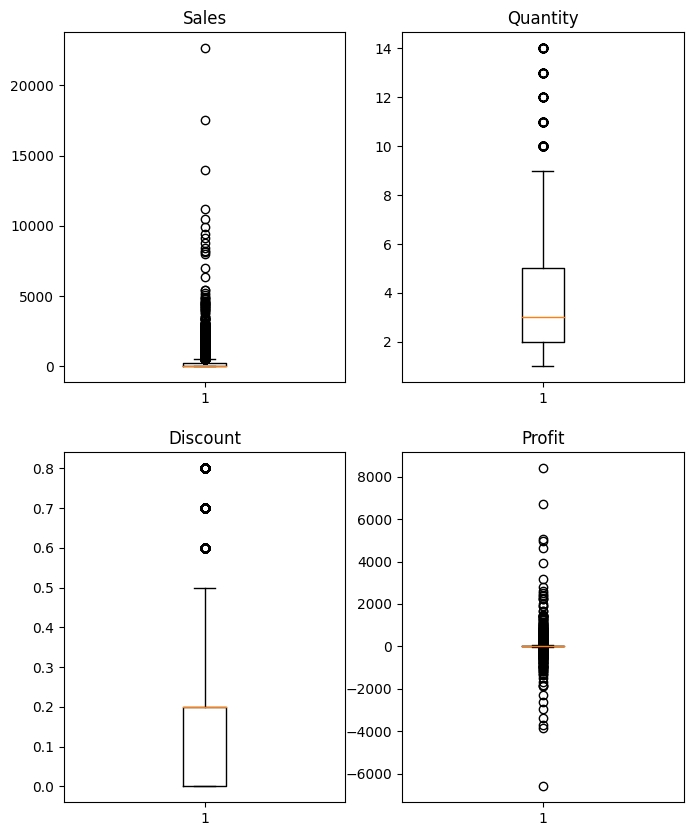

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [11]:
count = 0
plt.figure(figsize=(8,10))
for kolom in numeric.drop(columns=['Row ID']):
    count += 1
    plt.subplot(2,2,count)
    plt.boxplot(numeric[kolom])
    plt.title(kolom)
plt.show()
numeric.drop(columns='Row ID').describe()

Dari data diatas dapat disimpulkan bahwa:
- Sales memiliki nilai maksimum yang sangat jauh dengan Q3nya yang menandakan adanya outliers dan didukung juga dari boxplot. Akan tetapi nilai outlier ini masih dapat terjadi karena bisa saja perusahaan SaaS sewaktu waktu mendapatkan pesanan yang besar sehingga outlier ini masih bisa terjadi dengan alami dan tidak akan dihapus dari data agar tidak menghilangkan informasi penting lainnya
- Profit juga memiliki nilai maksimum yang sangan jauh dengan Q3nya serta nilai minimum yang sangat jauh juga dengan Q1 nya menandakan adanya outliers dan didukung juga dari boxplot. Sama seperti di kolom Sales, bahwa outlier ini masih bisa terjadi dengan alami dan tidak akan dihapus dari data agar tidak menghilangkan informasi penting lainnya
- Outlier pada Discount dan Quantity juga masih bisa tejadi alami jadi tidak akan dihapus dari data agar tidak menghilangkan informasi penting lainnya<br>

#### Distribusi data

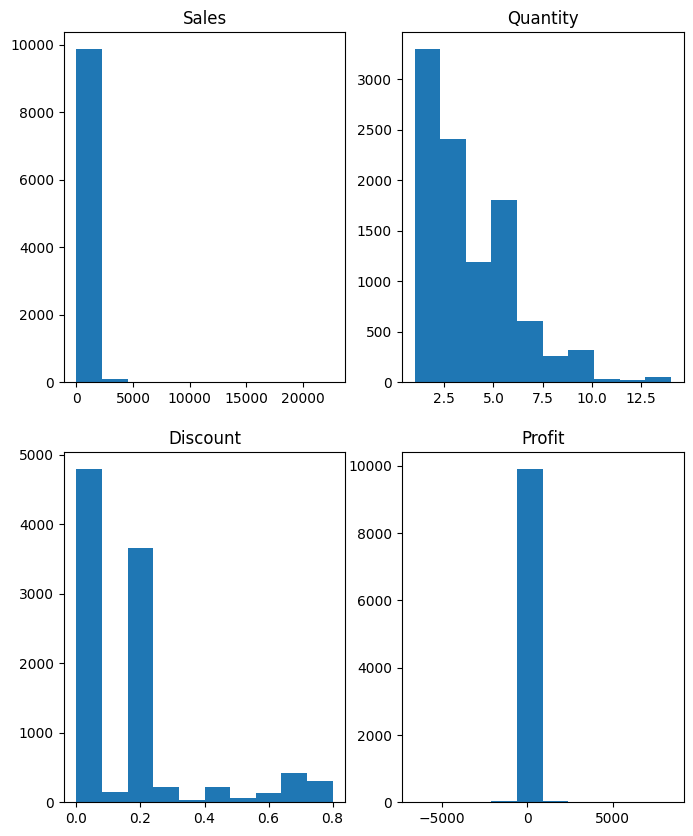

Kolom Sales terdistribusi tidak normal
Kolom Quantity terdistribusi tidak normal
Kolom Discount terdistribusi tidak normal
Kolom Profit terdistribusi tidak normal


In [12]:
count = 0
plt.figure(figsize=(8,10))
for kolom in numeric.drop(columns=['Row ID']):
    count += 1
    plt.subplot(2,2,count)
    plt.hist(numeric[kolom])
    plt.title(kolom)
plt.show()
for kolom in numeric.drop(columns='Row ID'):
    stat, pvalue = normaltest(numeric[kolom])
    if pvalue > 0.05:
        print('Kolom',kolom, 'terdistribusi normal')
    else:
        print('Kolom', kolom, 'terdistribusi tidak normal')

Dapat disimpulkan dari histogram maupun uji statistika, Semua data numerik memiliki distribusi yang tidak normal.

#### Uji Korelasi

Pertama tama kita lihat terlebih dahulu korelasi dengan scatter plot

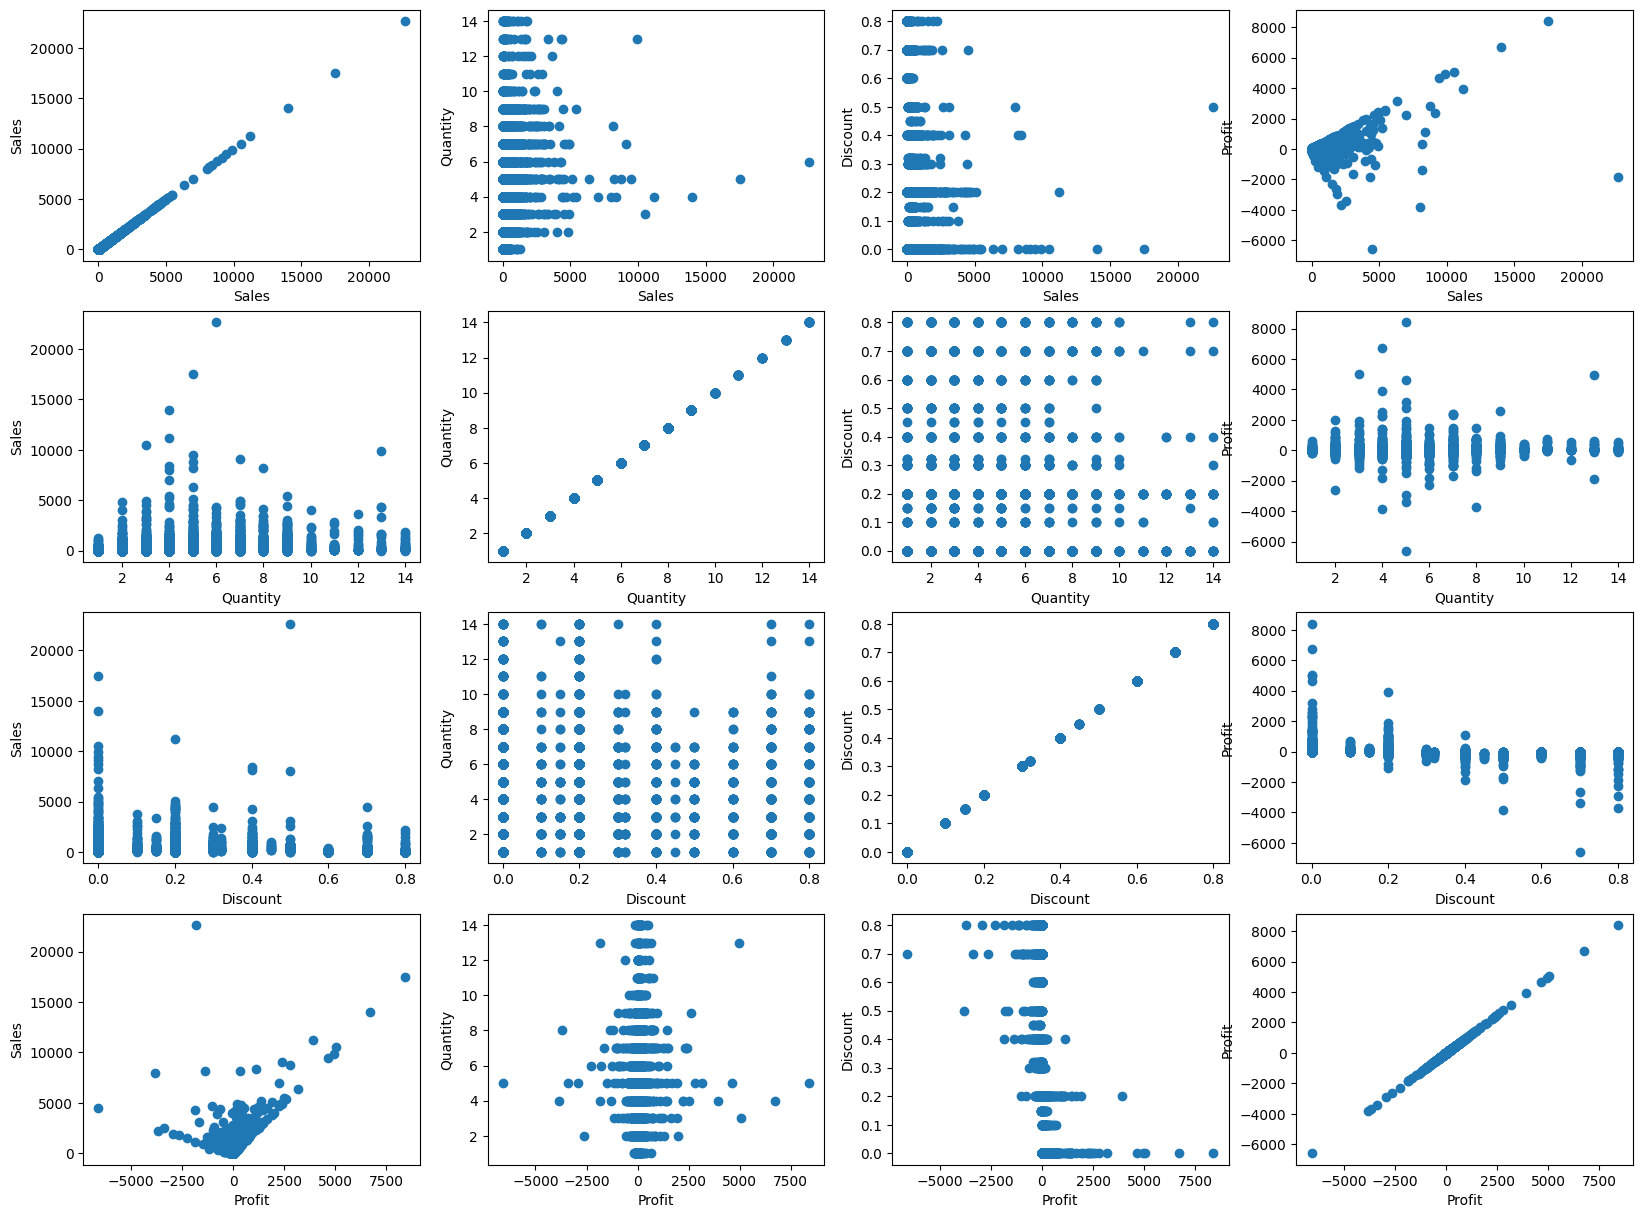

In [13]:
count = 0
plt.figure(figsize=(20,15))
for kolom1 in numeric.drop(columns=['Row ID']):
    for kolom2 in numeric.drop(columns=['Row ID']):
        count += 1
        plt.subplot(4,4,count)
        plt.scatter(x = numeric[kolom1], y =numeric[kolom2])
        plt.xlabel(kolom1)
        plt.ylabel(kolom2)
plt.show()

Setelah kita lihat korelasi dengan scatter plot. Ternyata tidak ada yang bisa kita uji dengan spearman maupun pearson kecuali 2 kolom yang sama seperi scatterplot antara profit dengan profit dikarenakan tidak ada yang memiliki hubungan linear maupun hubungan nonlinear atau monoatomik

## Data Kategorik

Membuat dataframe berisi data kategorik dengan License sebagai foreign key

In [14]:
categoric = df.select_dtypes([object, 'datetime'])
categoric.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD


Kita cek deskripsi dari data diatas

In [15]:
categoric.astype('object').describe()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,2022-09-06 00:00:00,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


Dari data diatas:
- Terdapat 5009 pesanan dari 9994 transaksi. Dapat disimpulkan satu pesanan bisa terdapat lebih dari satu transaksi
- Terdapat 1237 tanggal transaksi yang berbeda
- Terdapat juga 99 perusahaan berbeda dengan 793 nama orang berbeda yang memesan dari perusaahan SaaS ini
- Terdapat 3 region dengan 12 subregion yang terbagi lagi menjadi 48 negara dan 262 kota
- Terdapat 10 industri dan 3 segmen berbeda dari 99 perusahaan
- Terdapat 14 produk yang dijual perusahaan Saas ini
- Terdapat 9994 license yang unik dari 9994 license yang berarti setiap baris unik dan tidak adanya duplikat

In [16]:
year_min = categoric['Order Date'].dt.year.min()
year_max = categoric['Order Date'].dt.year.max()
print('Data teridiri dari tahun', year_min,'sampai tahun', year_max, 'dengan total', year_max - year_min + 1, 'Tahun')

Data teridiri dari tahun 2020 sampai tahun 2023 dengan total 4 Tahun


#### Frekeuansi tiap data kategorik 10 Tertinggi apabila terdapat lebih dari 10 macam

In [17]:
def bar(column):
    df6 = pd.DataFrame(categoric.groupby(column)[column].value_counts()).reset_index().sort_values(by='count', ascending=False).head(10)
    fig = px.bar(df6 , x = column, y = 'count', color=column, title=column)
    fig.show()
temporary = categoric.drop(columns='License')
for kolom in temporary:
    bar(kolom)

#### Unique Value Setiap Kolom

In [18]:
for kolom in categoric:
    print(kolom +':')
    display(categoric[kolom].unique())

Order ID:


array(['EMEA-2022-152156', 'AMER-2022-138688', 'EMEA-2021-108966', ...,
       'EMEA-2020-110422', 'AMER-2023-121258', 'AMER-2023-119914'],
      dtype=object)

Order Date:


<DatetimeArray>
['2022-11-09 00:00:00', '2022-06-13 00:00:00', '2021-10-11 00:00:00',
 '2020-06-09 00:00:00', '2023-04-16 00:00:00', '2022-12-06 00:00:00',
 '2021-11-22 00:00:00', '2020-11-11 00:00:00', '2020-05-13 00:00:00',
 '2020-08-27 00:00:00',
 ...
 '2022-10-12 00:00:00', '2020-06-18 00:00:00', '2023-03-01 00:00:00',
 '2021-05-09 00:00:00', '2020-11-06 00:00:00', '2021-12-29 00:00:00',
 '2020-04-03 00:00:00', '2022-06-04 00:00:00', '2021-04-12 00:00:00',
 '2020-01-22 00:00:00']
Length: 1237, dtype: datetime64[ns]

Contact Name:


array(['Nathan Bell', 'Deirdre Bailey', 'Zoe Hodges', 'Thomas Hodges',
       'Adrian Hunter', 'Adrian Abraham', 'Emily Morrison',
       'Claire Welch', 'Carol Campbell', 'Blake Hughes', 'Melanie Sharp',
       'Luke Bower', 'Jonathan Ferguson', 'Sam Parsons', 'Neil Gill',
       'Amelia Campbell', 'Chloe Short', 'Jasmine Metcalfe',
       'Karen Mathis', 'Dylan Dickens', 'Sophie Lewis', 'Gavin Mitchell',
       'Katherine Dowd', 'Harry Brown', 'Brian Dickens', 'Joseph Newman',
       'Nicola Howard', 'Stewart Wilson', 'Eric McLean', 'Leah Clarkson',
       'Alison Davidson', 'Sophie Vance', 'Anne Lee', 'Maria Dyer',
       'Julia Ellison', 'Gordon McLean', 'Jessica Buckland',
       'Bernadette Nolan', 'Sonia Ince', 'William Lewis', 'Melanie Young',
       'Edward Oliver', 'Peter Quinn', 'Max Marshall', 'Jan Watson',
       'Carol Ball', 'Gavin Walsh', 'Penelope Peake', 'Amy Scott',
       'Carl Jackson', 'Joe Wallace', 'Luke Mills', 'Alexandra Dyer',
       'Rebecca Dickens', 'Audre

Country:


array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

City:


array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

Region:


array(['EMEA', 'AMER', 'APJ'], dtype=object)

Subregion:


array(['UKIR', 'NAMER', 'EU-WEST', 'NOR', 'JAPN', 'EU', 'MEA', 'LATAM',
       'ANZ', 'APAC', 'IND', 'EU-EAST'], dtype=object)

Customer:


array(['Chevron', 'Phillips 66', 'Royal Dutch Shell', 'BNP Paribas',
       'Engie', 'Microsoft', 'Pfizer', 'Toyota Motor', 'Home Depot',
       'Wells Fargo', 'Carrefour', 'Costco Wholesale', 'McKesson',
       'Siemens', 'Intel', 'Glencore', 'Procter & Gamble',
       'Banco Santander', 'Pemex', 'Samsung Electronics', 'Sony',
       'Morgan Stanley', 'Bank of America Corp.', 'Tesco', 'Aviva',
       'Mondelez International', 'Abbott Laboratories', 'Fannie Mae',
       'Aetna', 'Oracle', 'Nissan Motor', 'Tyson Foods',
       'Verizon Communications', 'Itochu', 'Daimler', 'Walgreens',
       'Boeing', 'Valero Energy', 'Nestle', 'Philip Morris International',
       'Trafigura Group', 'Walmart', 'Cisco Systems',
       'Prudential Financial', 'Amazon', 'Gazprom', 'FedEx',
       'Honda Motor', 'CVS Health', 'General Motors',
       'State Farm Insurance Cos.', 'Comcast', 'AmerisourceBergen',
       'Johnson & Johnson', 'HonHai Precision Industry',
       'American Express', 'J.P. Morgan

Industry:


array(['Energy', 'Finance', 'Tech', 'Healthcare', 'Manufacturing',
       'Retail', 'Consumer Products', 'Misc', 'Transportation',
       'Communications'], dtype=object)

Segment:


array(['SMB', 'Strategic', 'Enterprise'], dtype=object)

Product:


array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

License:


array(['16GRM07R1K', 'QLIW57KZUV', 'JI6BVL70HQ', ..., 'I5SVMI6M88',
       'JHLW4P6LQ2', '3NTBV9B3PS'], dtype=object)

Dari data diatas, tidak terlihat adanya typo maupun inconsistent

# Drop columns

In [19]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Contact Name', 'Country', 'City',
       'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment',
       'Product', 'License', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Karena pada kali ini kita akan menjawab tentang memaksimalkan profit dengan mengurangi kerugian maka kita tidak akan membutuhkan beberapa data, yaitu:
- Row ID (karena merupakan unique value, jadi setiap baris memiliki nilai yang berbeda dan tidak berhubungan dengan kerugian)
- Order ID (karena jumlahnya terlalu banyak)
- Contact Name (karena terlalu banyak jumlahnya, jadi kita menggunakan subregion)
- Country (karena terlalu banyak jumlahnya, jadi kita menggunakan subregion)
- City (karena terlalu banyak jumlahnya, jadi kita menggunakan subregion)
- Region (karena terlalu sedikit jumlahnya, jadi kita menggunakan subregion)
- Customer (karena sudah ada Customer ID)
- Segment (karena terlalu sedikit jumlahnya, jadi kita menggunakan industry)
- License (karena merupakan unique value, jadi setiap baris memiliki nilai yang berbeda dan tidak berhubungan dengan kerugian)

In [20]:
df.drop(columns=['Row ID', 'Order ID', 'Contact Name', 'Country', 'City', 'Region', 'Customer', 'Segment', 'License'], inplace=True)

## Clean Data

Berikut 5 data setelah dibersihkan dan mengeluarkan kolom yang tidak dibutuhkan dalam analisa kali ini 

In [21]:
df.head(5)

,Order Date,Subregion,Customer ID,Industry,Product,Sales,Quantity,Discount,Profit
0,2022-11-09,UKIR,1017,Energy,Marketing Suite,261.9600,2,0.00,41.9136
1,2022-11-09,UKIR,1017,Energy,FinanceHub,731.9400,3,0.00,219.5820
2,2022-06-13,NAMER,1056,Energy,FinanceHub,14.6200,2,0.00,6.8714
3,2021-10-11,EU-WEST,1031,Energy,ContactMatcher,957.5775,5,0.45,-383.0310
4,2021-10-11,EU-WEST,1031,Energy,Marketing Suite - Gold,22.3680,2,0.20,2.5164


# Data Analysis

Untuk menjawab faktor apa saja yang membuat perusahaan merugi, Kita mulai dari mengecek produk apa yang membuat profit paling sedikit 

#### Pengaruh Produk terhadap Total Profit

In [22]:
productProfit = df[['Product', 'Profit']].copy()
productProfit = productProfit.groupby('Product')
productProfit = productProfit.sum().sort_values(by='Profit', ascending=False)
productProfit.reset_index(inplace=True)
px.bar(productProfit, x = 'Product', y = 'Profit')


Setelah dianalisa ternyata profit keseluruhan dari Marketing Suite tidak menciptakan keuntungan, tetapi malah kerugian. Setelah itu saya akan mengecek apakah semakin besar Kuantitas akan meningkatkan Sales

#### Pengaruh Quantity terhadap sales

Pada kali ini kita memakai median dari Sales karena data tidak terdistribusi normal

In [23]:
quantitySales = df[['Quantity', 'Sales']].copy()
quantitySales = quantitySales.groupby('Quantity')
quantitySales = quantitySales.median()
quantitySales.reset_index(inplace=True)
px.bar(quantitySales, x = 'Quantity', y = 'Sales')

Ternyata dari data kita bisa tau bahwa masih normal, semakin banyak kuantitasnya semakin besar juga salesnya. Setelah itu saya lihat lagi apakah semakin banyak kuantitas, Salesnya akan meningkat

#### Pengaruh Quantity terhadap Profit

Pada kali ini kita memakai median dari Profit karena data tidak terdistribusi normal

In [24]:
quantityProfit = df[['Quantity', 'Profit']].copy()
quantityProfit = quantityProfit.groupby('Quantity')
quantityProfit = quantityProfit.median()
quantityProfit.reset_index(inplace=True)
px.bar(quantityProfit, x = 'Quantity', y = 'Profit')

Ternyata dari data kita bisa tau bahwa masih normal, semakin banyak kuantitasnya semakin besar juga profitnya. Berarti kenapa masih terdapat produk dengan profit yang minus? Maka dari itu saya cek apakah diskon yang membuat profit menjadi minus

#### Pengaruh Diskon terhadap Total Profit

In [25]:
discountProfit = df[['Discount', 'Profit']].copy()
discountProfit = discountProfit.groupby('Discount')
discountProfit = discountProfit.sum()
discountProfit.reset_index(inplace=True)
px.bar(discountProfit, x = 'Discount', y = 'Profit')


Dapat dilihat melalui barplot, ternyata dengan memberikan diskon diatas 0.2 membuat perusahaan rugi dan paling besar kerugiannya di 0.7. Selain itu kita mengetahui juga bahwa jumlah profit dari transaksi yang tanpa diskon sebesar 320k. Setelah mengetahui bahwa total profit dari transaksi yang didiskon 0.3 keatas mines, maka kita cek jumlah kerugian dari yang diskon 0 hingga 0.8.

#### Perbandingan total kerugian dari transaksi yang didiskon dengan yang tidak didiskon

In [26]:
discountLoss = df[['Discount', 'Profit']].copy()
discountLoss = discountLoss[discountLoss['Profit'] < 0]
discountLoss = discountLoss.groupby('Discount')
discountLoss = discountLoss.sum()
discountLoss.reset_index(inplace=True)
px.bar(discountLoss, x = 'Discount', y = 'Profit')

Dapat dilihat dari barplot diatas bahwa diskon 0 tidak ada profit yang mines pada setiap transaksinya. Maka dari itu, kita bisa menyimpulkan bahwa hanya transaksi yang diskonlah yang menimbulkan kerugian. Karena dengan memberikan diskon malah membuat perusahaan merugi, maka kita cek berapa banyak transaksi yang diskon dan tidak diskon per tahun

#### Banyak transaksi yang didiskon dengan yang tidak dan jumlah profit tiap tahun

In [27]:
dateDiscount = df[['Order Date', 'Discount']].copy()
def a(x):
    if x == 0:
        return 'False'
    else:
        return 'True'
dateDiscount['Discount'] = dateDiscount['Discount'].apply(a)
dateDiscount['Order Date'] = df['Order Date'].dt.year
dateDiscount['Count'] = 1 
dateDiscount = dateDiscount.groupby(['Discount','Order Date'])
dateDiscount = dateDiscount.count()
dateDiscount = dateDiscount.reset_index()
fig = px.bar(dateDiscount,  x = 'Order Date',y = 'Count', color='Discount', title='Banyak Transaksi yang Terdapat Diskon dan Tidak Diskon per tahun')
fig.show()
dateProfit = df[['Order Date', 'Profit']].copy()
dateProfit['Order Date'] = df['Order Date'].dt.year
dateProfit = dateProfit.groupby('Order Date')
dateProfit = dateProfit.sum().sort_values(by='Profit', ascending=False)
dateProfit.reset_index(inplace=True)
fig = px.bar(dateProfit, x = 'Order Date', y = 'Profit', title='Jumlah Profit setiap Tahun')
fig.show()

Ternyata setelah kita lihat, perusahaan ini hampir sama antara jumlah transaksi yang didiskon dan yang tidak, cuman transaksi yang didiskon lebih banyak sedikit (tidak signifikan). Dapat dilihat juga banyak transaksi semakin besar tiap tahun dan sejalan dengan profit yang meningkat tiap tahun yang disebabkan oleh jumlah transaksi yang semakin banyak tiap tahun. Karena dengan memberikan diskon perusahaan malah merugi, dan jumlah transaksi yang didiskon tidak jauh berbeda dengan yang tidak didiskon, maka salah satu perkiraan adalah perusahaan sedang bakar uang untuk mendapatkan customer. Maka dari itu kita cek apakah customer bertambah tiap tahun.

#### Customer bertambah tiap tahun

In [28]:
dateCustomer = df[['Order Date', 'Customer ID']].copy()
dateCustomer['Order Date'] = dateCustomer['Order Date'].dt.year
dateCustomer = dateCustomer.groupby('Order Date').agg(list).reset_index()
Y1 = dateCustomer.iloc[0]['Customer ID']
Y2 = dateCustomer.iloc[1]['Customer ID'] + Y1
Y3 = dateCustomer.iloc[2]['Customer ID'] + Y2
Y4 = dateCustomer.iloc[3]['Customer ID'] + Y3
totalCustomer = pd.DataFrame({'Customer ID' : [Y1, Y2, Y3, Y4], 'Order Date' : dateCustomer['Order Date']})
totalCustomer['Customer ID'] = totalCustomer['Customer ID'].apply(np.array)
totalCustomer['Customer ID'] = totalCustomer['Customer ID'].apply(np.unique)
totalCustomer['Customer ID'] = totalCustomer['Customer ID'].apply(len)
px.bar(totalCustomer, x = 'Order Date', y = 'Customer ID', title='Banyak Customer yang Pernah Memesan per Tahun')

Dari barplot diatas dapat diketahui bahwa dari 2020 - 2023 tidak ada bertambahnya customer yang berarti semua customer sudah terkumpul di tahun pertama (tahun 2020)

#### Banyak transaksi yang didiskon dengan yang tidak dan jumlah profit tiap Industry

In [29]:
subDiscount = df[['Industry', 'Discount']].copy()
subDiscount['Discount'] = subDiscount['Discount'].apply(a)
subDiscount['Count'] = 1
subDiscount['Industry'].nunique()
subDiscount = subDiscount.groupby(['Discount','Industry'])
subDiscount = subDiscount.count()
subDiscount = subDiscount.reset_index().sort_values('Count', ascending=False)
fig = px.bar(subDiscount,  x = 'Industry',y = 'Count', color='Discount', title='Banyak Transaksi yang Terdapat Diskon dan Tidak Diskon per Industry')
fig.show()
subProfit = df[['Industry', 'Profit']].copy()
subProfit = subProfit.groupby('Industry')
subProfit = subProfit.sum().sort_values(by='Profit', ascending=False)
subProfit.reset_index(inplace=True)
fig = px.bar(subProfit, x = 'Industry', y = 'Profit', title='Jumlah Profit setiap Industry')
fig.show()

Ternyata setelah melihat barplot diatas jumlah profit setiap Industry cendrung sejalan dengan banyaknya transaksi yang disebabkan jumlah transaksi yang diskon dengan jumlah transaksi yang tidak diskon tidak jauh berbeda (tidak signifikan) di setiap industy

#### Banyak transaksi yang didiskon dengan yang tidak dan jumlah profit tiap subregion

In [30]:
subDiscount = df[['Subregion', 'Discount']].copy()
subDiscount['Discount'] = subDiscount['Discount'].apply(a)
subDiscount['Count'] = 1
subDiscount['Subregion'].nunique()
subDiscount = subDiscount.groupby(['Discount','Subregion'])
subDiscount = subDiscount.count()   
subDiscount = subDiscount.reset_index().sort_values('Count', ascending= False)
fig = px.bar(subDiscount,  x = 'Subregion',y = 'Count', color='Discount', title='Banyak Transaksi yang Terdapat Diskon dan Tidak Diskon per Subregion')
fig.show()
subProfit = df[['Subregion', 'Profit']].copy()
subProfit = subProfit.groupby('Subregion')
subProfit = subProfit.sum().sort_values(by='Profit', ascending=False)
subProfit.reset_index(inplace=True)
fig = px.bar(subProfit, x = 'Subregion', y = 'Profit', title='Jumlah Profit setiap Subregion')
fig.show()

Dapat dilihat dari grafik bahwa subregion NAMER dengan jumlah transaksi yang tidak diskon terbanyak otomatis berada di peringkat satu jumlah profit, sedangkan JAPN yang merupakan nomor dua jumlah transaksi yang diskon paling banyak tanpa adanya transaksi yang tidak diskon membuatnya di peringkat terakhir di jumlah profit dan bahkan jumlah profitnya minus. Hal ini memperkuat bukti bahwa diskon yang mempengaruhi profit menjadi mines

#### Banyak transaksi yang didiskon dengan yang tidak dan jumlah profit tiap jenis produk

In [31]:
productDiscount = df[['Product', 'Discount']].copy()
productDiscount['Discount'] = productDiscount['Discount'].apply(a)
productDiscount['Count'] = 1 
productDiscount = productDiscount.groupby(['Discount','Product'])
productDiscount = productDiscount.count()
productDiscount = productDiscount.reset_index().sort_values('Count', ascending=False)
fig = px.bar(productDiscount,  x = 'Product',y = 'Count', color='Discount', title='Banyak Transaksi yang Terdapat Diskon dan Tidak Diskon per Produk')
fig.show()
fig = px.bar(productProfit, x = 'Product', y = 'Profit', title = 'Jumlah Profit setiap Produk')
fig.show()

Dapat dilihat dari barplot diatas bahwa alchamy yang memiliki jumlah transaksi paling sedikit bisa menghasilkan profit paling besar dikarenakan perbedaan harga pada setiap produk sehingga walaupun Big Ol Database memiliki jumlah transaksi terkecil kedua, tetapi berada pada peringkat ketiga terkecil dalam menghasilkan profit. Sehingga tidak bisa dibandingkan seperti subregion pada barplot sebelumnya.

#### Uji Statistika apakah proporsi diskon transaksi lebih besar dari proporsi transaksi yang tidak diskon

In [32]:
Discount = df[df['Discount'] == 0]['Discount'].count()
notDiscount = df[df['Discount'] != 0]['Discount'].count()
total = df['Discount'].count()
z_stat, p_value = proportions_ztest([Discount,notDiscount], [total,total], alternative='larger')
if p_value/2<=0.05:
    print('Proporsi transaksi yang didiskon lebih besar dari proporsi transaksi yang tidak diskon')
else:
    print('Proporsi transaksi yang didiskon sama dengan proporsi transaksi yang tidak diskon')

Proporsi transaksi yang didiskon sama dengan proporsi transaksi yang tidak diskon


Karena H0 ditolak maka kita cek apakah proporsi transaksi yang didiskon lebih kecil dari yang tidak di diskon

In [33]:
z_stat, p_value = proportions_ztest([Discount,notDiscount], [total,total], alternative='smaller')
if p_value/2<=0.05:
    print('Proporsi transaksi yang didiskon lebih kecil dari proporsi transaksi yang tidak diskon')
else:
    print('Proporsi transaksi yang didiskon sama dengan proporsi transaksi yang tidak diskon')

Proporsi transaksi yang didiskon lebih kecil dari proporsi transaksi yang tidak diskon


## Kondisi diskon saat Customer Melakukan Transaksi

Setelah kita mengetahui bahwa diskon membuat keuntungan menjadi minus, kita akan cek apakah ada yang hanya melakukan transaksi saat sedang diskon saja, atau saat sedang tidak diskon saja, atau keduanya

In [34]:
coba = pd.crosstab( df['Customer ID'], df['Discount'])
disc =  coba[coba[0] == 0][0].count()
print('Banyak Customer yang hanya memesan saat sedang diskon :',disc)
coba = df[['Customer ID', 'Discount']].copy()
coba = coba.groupby('Customer ID').sum().reset_index()
notdisc = coba[coba['Discount'] == 0]['Customer ID'].count()
# notdisc = df2[df2['Discount'] == 0][0].count()
print('Banyak Customer yang hanya memesan saat sedang tidak diskon :',notdisc)
print('Banyak Customer yang memesan saat sedang diskon dan tidak diskon :',df['Customer ID'].nunique())


Banyak Customer yang hanya memesan saat sedang diskon : 0
Banyak Customer yang hanya memesan saat sedang tidak diskon : 0
Banyak Customer yang memesan saat sedang diskon dan tidak diskon : 99


Ternyata semua customer memesan saat sedang diskon dan tidak diskon. Maka dari itu kita cek apakah pada setiap bulan pada tahun pertama (2020), jumlah customer yang pernah membeli di perusahaan Saas ini bertambah atau tidak

In [35]:
dateCustomer = df[['Order Date', 'Customer ID']].copy()
dateCustomer = dateCustomer[dateCustomer['Order Date'].dt.year == 2020]
dateCustomer['Order Date'] = dateCustomer['Order Date'].dt.month
dateCustomer = dateCustomer.groupby('Order Date').agg(list).reset_index()
M1 = dateCustomer.iloc[0]['Customer ID']
M2 = dateCustomer.iloc[1]['Customer ID'] + M1
M3 = dateCustomer.iloc[2]['Customer ID'] + M2
M4 = dateCustomer.iloc[3]['Customer ID'] + M3
M5 = dateCustomer.iloc[4]['Customer ID'] + M4
M6 = dateCustomer.iloc[5]['Customer ID'] + M5
M7 = dateCustomer.iloc[6]['Customer ID'] + M6
M8  = dateCustomer.iloc[7]['Customer ID'] + M7
M9 = dateCustomer.iloc[8]['Customer ID'] + M8
M10 = dateCustomer.iloc[9]['Customer ID'] + M9
M11 = dateCustomer.iloc[10]['Customer ID'] + M10
M12 = dateCustomer.iloc[11]['Customer ID'] + M11
totalCustomer = pd.DataFrame({'Customer ID' : [M1, M2, M3, M4, M5, M6, M7, M8, M9, M10, M11, M12,], 'Order Date' : dateCustomer['Order Date']}, )
totalCustomer['Customer ID'] = totalCustomer['Customer ID'].apply(np.array)
totalCustomer['Customer ID'] = totalCustomer['Customer ID'].apply(np.unique)
totalCustomer['Customer ID'] = totalCustomer['Customer ID'].apply(len)
px.bar(totalCustomer, x = 'Order Date', y = 'Customer ID', title='Banyak Customer yang pernah memesan per bulan (2020)')

Berarti sebenarnya perusahaan berhasil dalam bakar uang untuk mendapatkan customer tetapi sejak bulan ke 9 tahun 2020 sampai tahun 2023 tidak ada kenaikan customer. Jadi seharusnya perusahaan sudah tidak bakar uang lagi. Setelah itu kita cek apakah perusahaan setiap bulan memberikan diskon.

In [36]:
dateDiscount = df[['Order Date', 'Discount']].copy()
def a(x):
    if x == 0:
        return 'False'
    else:
        return 'True'
dateDiscount['Discount'] = dateDiscount['Discount'].apply(a)
dateDiscount['Order Date'] = df['Order Date'].dt.month
dateDiscount['Count'] = 1 
dateDiscount = dateDiscount.groupby(['Discount','Order Date'])
dateDiscount = dateDiscount.count()
dateDiscount = dateDiscount.reset_index()
px.bar(dateDiscount,  x = 'Order Date',y = 'Count', color='Discount', title='Banyak Transaksi yang Terdapat Diskon dan Tidak Diskon per Bulan')

Setelah melihat barplot diatas, perusahaan masih memberikan diskon tiap bulan. Maka dari itu diperlukan pengurangan pemberian diskon hingga diskon hanya diberikan tiap hari khusus seperti tahun baru atau natal

#### Uji Statistika apakah rata rata kerugian lebih besar dar rata rata keuntungan

In [37]:
result = list(mannwhitneyu(df[df['Profit'] < 0]['Profit'].apply(lambda a: a * -1),df[df['Profit'] > 0]['Profit'], alternative = 'greater'))
if result[1]/2<=0.05:
    print('Rata-rata kerugian lebih besar daripada keuntungan')
else:
    print('Rata-rata keuntungan sama dengan kerugian')

Rata-rata kerugian lebih besar daripada keuntungan


Ternyata setelah kita uji statistika, rata rata kerugian lebih besar daripada keuntungan. Setelah itu kita cek seberapa besar tentang kerugian dan keuntungan pada data

In [38]:
nonprofit = df[df['Profit'] < 0]['Profit'].apply(lambda a: a * -1).sum()
total = df['Profit'].sum()
proporsi = round(nonprofit/total * 100, 2) 
print('Jumlah kerugian                                               : {:,}'.format(round(nonprofit)))
print('Jumlah keuntungan keseluruhan                                 : {:,}'.format(round(total)))
print('Jumlah keuntungan apabila kerugian ditiadakan (dianggap 0)    : {:,}'.format(round(total + nonprofit)))
print('Persentase jumlah kerugian dari total keuntungan dan kerugian :', proporsi,'%')

Jumlah kerugian                                               : 156,131
Jumlah keuntungan keseluruhan                                 : 286,397
Jumlah keuntungan apabila kerugian ditiadakan (dianggap 0)    : 442,528
Persentase jumlah kerugian dari total keuntungan dan kerugian : 54.52 %


Keterangan :
- Jumlah kerugian dari total keuntungan dan kerugian = jumlah profit yang mines / jumlah profit yang mines dan plus X 100%
- Jumlah kerugian = jumlah profit yang mines
- Jumlah keuntungan dari transaksi tanpa diskon = jumlah seluruh profit, Discount == 0
- Jumlah keuntungan dari transaksi yang didiskon = jumlah seluruh profit, Discount != 0
- Jumlah keuntungan keseluruhan = jumlah profit yang mines dan plus
- Jumlah keuntungan apabila kerugian ditiadakan = jumlah keuntungan keseluruhan - jumlah kerugian

Setelah melihat bahwa keuntungan keseluruhan masih plus walaupun rata rata kerugian lebih besar dibandingkan rata rata keuntungan. Selain itu persentase jumlah kerugian melebih setengah dari jumlah keuntungan keseluruhan. Maka dari itu kita cek berapa banyak transaksi tanpa diskon dengan yang didiskon.

In [39]:
Profit = df[df['Profit'] > 0]['Profit'].count()
nonProfit = df[df['Profit'] < 0]['Profit'].count()
print('Jumlah transaksi dengan profit minus :', nonProfit)
print('Jumlah transaksi dengan profit plus :',Profit)

Jumlah transaksi dengan profit minus : 1871
Jumlah transaksi dengan profit plus : 8058


Setelah kita cek ternyata jumlah transaksi dengan profit plus jauh lebih banyak yang membuat keuntungan keseluruhan masih plus

## Kesimpulan

1. Faktor yang menyebabkan profit menjadi minus adalah pemberian diskon.
2. Proporsi transaksi yang tidak di diskon dengan yang didiskon tidak berbeda jauh yang membuat persentase jumlah kerugian dari total keuntungan keseluruhan adalah 54,52%
3. Rata rata kerugian lebih besar dibandingkan rata rata keuntungan
4. Tidak ada bertambahnya Customer dari bulan september tahun 2020-2023, walaupun sudah memberikan diskon hingga membuat profit suatu transaksi menjadi minus
5. Dengan mengandaikan bahwa keuntungan yang minus dianggap tidak ada maka jumlah keuntungan akan bertambah sebanyak 54.52%
6. Semua customer pernah membeli saat sedang diskon dan saat sedang tidak diskon

## Rekomendasi


1. Perlu adanya evaluasi lagi pada besaran discount yang diberikan
2. Discount yg diberikan bisa dikurangi secara bertahap dan tetap diberikan pada produk yang lebih berpotensi laku
3. Besaran discount dapat diberikan juga secara seasonal ( hanya diberikan pada event tertentu saja dan tidak sepanjang tahun)
3. Penambahan pada customer baru diperlukan karena dari tahun 2020-2023 cenderung stuck yang membuat pejualan tidak bisa naik